# 1. Import Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
# Optional: Set plot styles for background
sns.set(style='whitegrid')

# 2. Load and Inspect Data

In [117]:
file_path = r'C:\Users\alesa\OneDrive\Desktop\Afame tech\ECOMM DATA.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

In [118]:
# Inspect the first few rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [119]:
# Check the data types and for missing values
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
std,14806.29199,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810
min,1.00000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000


# 3. Data Cleaning

In [120]:
# Handle missing values by dropping rows with any missing values
df = df.dropna()

In [121]:
# Convert orderdate and shipdate columns to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [122]:
# Remove duplicate rows
df = df.drop_duplicates()

In [123]:
# Verify the cleaning steps
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 51287
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   City            9994 non-null   object        
 9   State           9994 non-null   object        
 10  Country         9994 non-null   object        
 11  Postal Code     9994 non-null   float64       
 12  Market          9994 non-null   object        
 13  Region          9994 non-null   object        
 14  Product ID      9994 non-null   object        
 15  Cat

# 4. Data Exploration and Preprocessing

In [124]:
# Descriptive statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,36293.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,23.831678
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,58.962848
min,31297.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.010000
25%,33795.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,1.490000
50%,36293.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,5.100000
75%,38791.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,19.985000
max,41290.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,933.570000


In [125]:
# Create new columns for year, month, and day from orderdate
df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day'] = df['Order Date'].dt.day

In [126]:
# Verify the new columns
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order_Year,Order_Month,Order_Day
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,31
8,40155,CA-2014-135909,2014-10-14,2014-10-21,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,...,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low,2014,10,14
9,40936,CA-2012-116638,2012-01-28,2012-01-31,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,...,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical,2012,1,28
10,34577,CA-2011-102988,2011-04-05,2011-04-09,Second Class,GM-14695,Greg Maxwell,Corporate,Alexandria,Virginia,...,Martin Yale Chadless Opener Electric Letter Op...,4164.050,5,0.0,83.2810,846.54,High,2011,4,5
16,36178,CA-2014-143567,2014-11-03,2014-11-06,Second Class,TB-21175,Thomas Boland,Corporate,Henderson,Kentucky,...,Logitech diNovo Edge Keyboard,2249.910,9,0.0,517.4793,780.70,Critical,2014,11,3


# 5. Total Sales Calculation

In [127]:
# Total sales revenue
total_sales = df['Profit'].sum()
print(f"Total Sales: {total_sales}")

Total Sales: 286397.0217


In [128]:
# Total sales by product
sales_by_product = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False)
print(sales_by_product)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
                                                                                  ...    
Bush Advantage Collection Racetrack Conference Table                           -1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                       -2876.1156
Cubify CubeX 3D Printer Triple Head Print                                      -3839.9904
Lexmark MX611dhe Monochrome Laser Printer                                      -4589.9730
Cubify CubeX 3D Printer Double Head Print                                      -8879.97

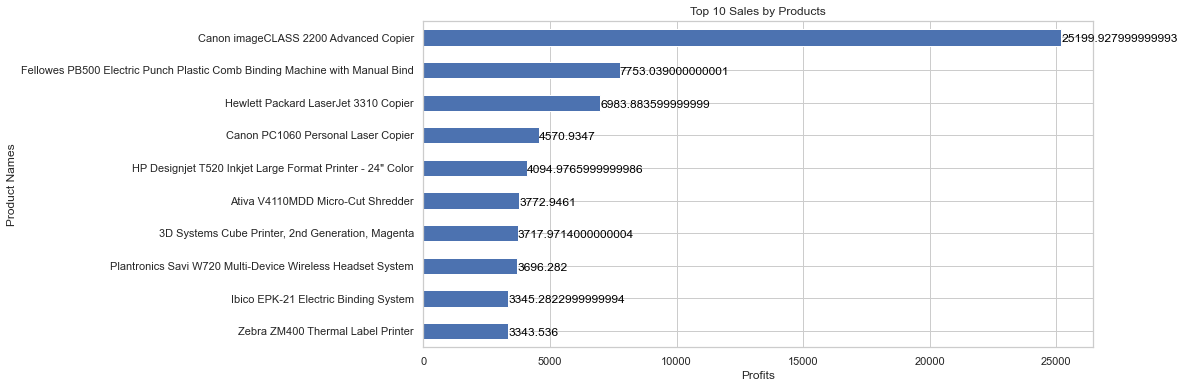

In [129]:
# Get the top 10 products by revenue and sort them in descending order
sales_by_product = sales_by_product.nlargest(10).sort_values(ascending=True)

# Plot top 10 products by profit
plt.figure(figsize=(12, 6))
ax =sales_by_product.plot(kind='barh')
plt.title('Top 10 Sales by Products')
plt.xlabel('Profits')
plt.ylabel('Product Names')

# Annotate bars with quantities
for i in ax.patches:
    ax.annotate(str(i.get_width()), (i.get_width() + 6, i.get_y() + 0.1), fontsize=12, color='black')
plt.show()

# 6. Analyze Sales Trends Over Time

In [130]:
# Resample data by month to get monthly sales using orderdate
monthly_sales = df.resample('M', on='Order Date')['Profit'].sum()

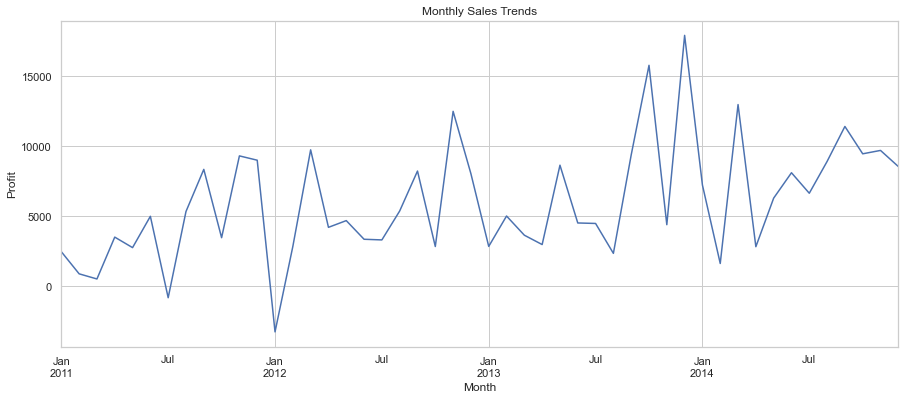

In [131]:
# Plot monthly sales trends
plt.figure(figsize=(15, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.show()

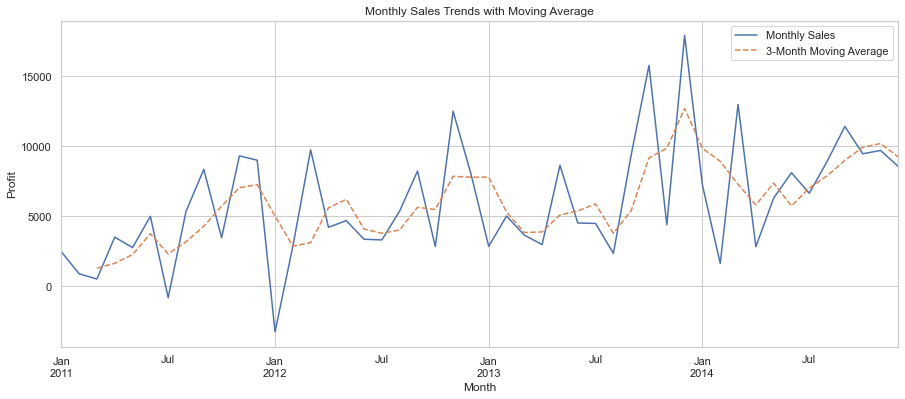

In [132]:
# Calculate and plot a moving average (e.g., 3-month moving average)
monthly_sales_ma = monthly_sales.rolling(window=3).mean()
plt.figure(figsize=(15, 6))
monthly_sales.plot(label='Monthly Sales')
monthly_sales_ma.plot(label='3-Month Moving Average', linestyle='--')
plt.title('Monthly Sales Trends with Moving Average')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.legend()
plt.show()

# 7. Determine Best-Selling Products

In [133]:
# Top 5 products by profit
top_products = sales_by_product.head(5)
print(top_products)

Product Name
Zebra ZM400 Thermal Label Printer                             3343.5360
Ibico EPK-21 Electric Binding System                          3345.2823
Plantronics Savi W720 Multi-Device Wireless Headset System    3696.2820
3D Systems Cube Printer, 2nd Generation, Magenta              3717.9714
Ativa V4110MDD Micro-Cut Shredder                             3772.9461
Name: Profit, dtype: float64


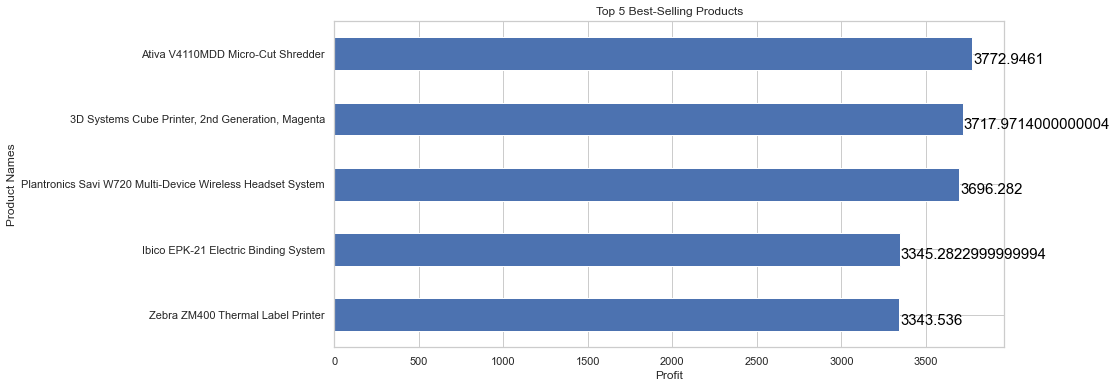

In [134]:
# Get the top 5 products by revenue and sort them in descending order
sales_by_product = top_products.nlargest(10).sort_values(ascending=True)

# Plot top 5 products by profit
plt.figure(figsize=(12, 6))
ax =top_products.plot(kind='barh')
plt.title('Top 5 Best-Selling Products')
plt.xlabel('Profit')
plt.ylabel('Product Names')

# Annotate bars with quantities
for i in ax.patches:
    ax.annotate(str(i.get_width()), (i.get_width() + 6, i.get_y() + 0.1), fontsize=15, color='black')
plt.show()

In [135]:
# Top products by quantity sold
sales_by_quantity = df.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)
top_quantity_products = sales_by_quantity.head(10)
print(top_quantity_products)

Product Name
Staples                                                       876
KI Adjustable-Height Table                                     74
Storex Dura Pro Binders                                        71
Avery Non-Stick Binders                                        71
GBC Premium Transparent Covers with Diagonal Lined Pattern     67
Situations Contoured Folding Chairs, 4/Set                     64
Chromcraft Round Conference Tables                             61
Eldon Wave Desk Accessories                                    61
Global Wood Trimmed Manager's Task Chair, Khaki                59
Wilson Jones Turn Tabs Binder Tool for Ring Binders            59
Name: Quantity, dtype: int64


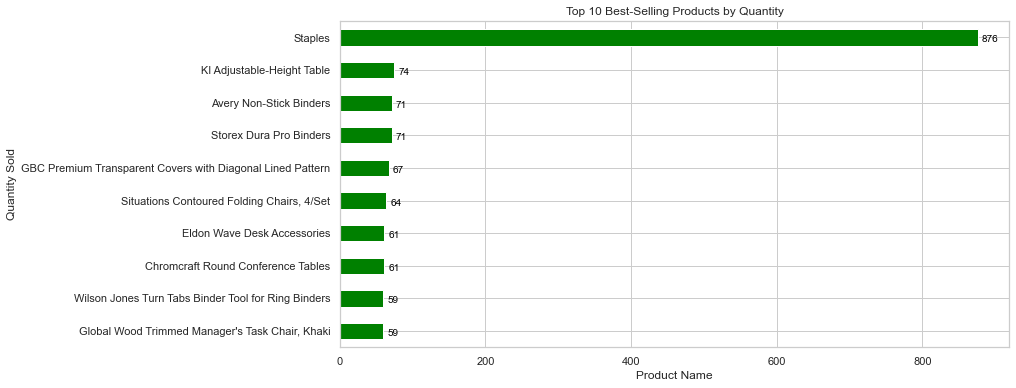

In [136]:
# Get the top 10 products by revenue and sort them in descending order
top_quantity_products = top_quantity_products.nlargest(10).sort_values(ascending=True)

# Plot top 10 products by quantity sold
plt.figure(figsize=(12, 6))
ax = top_quantity_products.plot(kind='barh', color='green')
plt.title('Top 10 Best-Selling Products by Quantity')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')

# Annotate bars with quantities
for i in ax.patches:
    ax.annotate(str(i.get_width()), (i.get_width() + 6, i.get_y() + 0.1), fontsize=10, color='black')
    
plt.show()

# 8. Build Visualizations

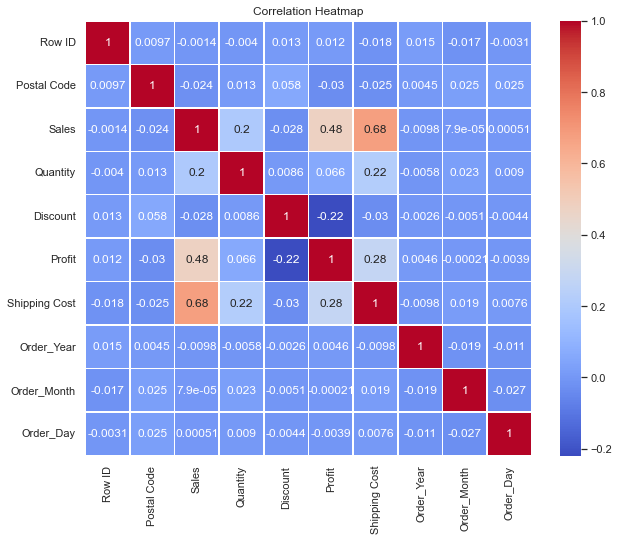

In [137]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [138]:
# Top products by quantity sold
sales_by_quantity = df.groupby('Customer Name')['Segment'].sum().sort_values(ascending=False)
top_quantity_products = sales_by_quantity.head(15)
print(top_quantity_products)

Customer Name
Paul Prost          Home OfficeHome OfficeHome OfficeHome OfficeHo...
Matt Abelman        Home OfficeHome OfficeHome OfficeHome OfficeHo...
Dean percer         Home OfficeHome OfficeHome OfficeHome OfficeHo...
Ben Ferrer          Home OfficeHome OfficeHome OfficeHome OfficeHo...
Laurel Beltran      Home OfficeHome OfficeHome OfficeHome OfficeHo...
Sanjit Jacobs       Home OfficeHome OfficeHome OfficeHome OfficeHo...
Rick Bensley        Home OfficeHome OfficeHome OfficeHome OfficeHo...
Lindsay Shagiari    Home OfficeHome OfficeHome OfficeHome OfficeHo...
Maria Etezadi       Home OfficeHome OfficeHome OfficeHome OfficeHo...
Mick Hernandez      Home OfficeHome OfficeHome OfficeHome OfficeHo...
Shirley Daniels     Home OfficeHome OfficeHome OfficeHome OfficeHo...
Eugene Moren        Home OfficeHome OfficeHome OfficeHome OfficeHo...
Frank Merwin        Home OfficeHome OfficeHome OfficeHome OfficeHo...
Katherine Murray    Home OfficeHome OfficeHome OfficeHome OfficeHo...
Nick Z

In [139]:
df.to_csv('cleaned_ecomm_data.csv', sep=',', index=False)

In [140]:
from IPython.display import FileLink

# Create a link to download the file
FileLink('cleaned_ecomm_data.csv')


C:\Users\alesa\OneDrive\Desktop\jupyter\cleaned_ecomm_data.csv